# Практическая работа №6

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

data=pd.read_csv('C:\\Users\\MSI\\educational_datasets\\student-mat.csv')
data

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,0,11,12,10


In [102]:
data.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


#### Предобработка данных

In [103]:
from sklearn. preprocessing import OneHotEncoder

data_nominal=data.loc[:,data.columns.isin(['Mjob','Fjob','reason','guardian'])]
data_nominal
rated_dummies = pd.get_dummies(data_nominal)
data = pd.concat([data, rated_dummies], axis=1)
data = data.drop('Mjob', axis = 1)
data = data.drop('Fjob', axis = 1)
data = data.drop('guardian', axis = 1)
data = data.drop('reason', axis = 1)

label = LabelEncoder()
label.fit(data.school)
data.school = label.transform(data.school)

label = LabelEncoder()
label.fit(data.sex)
data.sex = label.transform(data.sex)

label = LabelEncoder()
label.fit(data.address)
data.address = label.transform(data.address)

label = LabelEncoder()
label.fit(data.famsize)
data.famsize = label.transform(data.famsize)

label = LabelEncoder()
label.fit(data.Pstatus)
data.Pstatus = label.transform(data.Pstatus)

label = LabelEncoder()
label.fit(data.schoolsup)
data.schoolsup = label.transform(data.schoolsup)

label = LabelEncoder()
label.fit(data.famsup)
data.famsup = label.transform(data.famsup)

label = LabelEncoder()
label.fit(data.paid)
data.paid = label.transform(data.paid)

label = LabelEncoder()
label.fit(data.activities)
data.activities = label.transform(data.activities)

label = LabelEncoder()
label.fit(data.nursery)
data.nursery = label.transform(data.nursery)

label = LabelEncoder()
label.fit(data.higher)
data.higher = label.transform(data.higher)

label = LabelEncoder()
label.fit(data.internet)
data.internet = label.transform(data.internet)

label = LabelEncoder()
label.fit(data.romantic)
data.romantic = label.transform(data.romantic)

data

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,traveltime,studytime,...,Fjob_other,Fjob_services,Fjob_teacher,reason_course,reason_home,reason_other,reason_reputation,guardian_father,guardian_mother,guardian_other
0,0,0,18,1,0,0,4,4,2,2,...,0,0,1,1,0,0,0,0,1,0
1,0,0,17,1,0,1,1,1,1,2,...,1,0,0,1,0,0,0,1,0,0
2,0,0,15,1,1,1,1,1,1,2,...,1,0,0,0,0,1,0,0,1,0
3,0,0,15,1,0,1,4,2,1,3,...,0,1,0,0,1,0,0,0,1,0
4,0,0,16,1,0,1,3,3,1,2,...,1,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,1,1,20,1,1,0,2,2,1,2,...,0,1,0,1,0,0,0,0,0,1
391,1,1,17,1,1,1,3,1,2,1,...,0,1,0,1,0,0,0,0,1,0
392,1,1,21,0,0,1,1,1,1,1,...,1,0,0,1,0,0,0,0,0,1
393,1,1,18,0,1,1,3,2,3,1,...,1,0,0,1,0,0,0,0,1,0


## Построение прогноза итогового балла учащегося.

#### Выберем объясняемую переменную и выделим её отдельно. Также удалим её из начального набора данных.
##### Объясняемой переменной является признак $G3$ - итоговый балл обучающихся. Удаляем параметры G2, G3, так как они колинеарны с объясняемой переменной.

In [104]:
parameters=data.loc[:,data.columns.isin(['school','sex','age','address','famsize','Pstatus','Medu','Fedu','Mjob_other', 'Mjob_services', 'Mjob_at_home', 'Mjob_teacher', 'Mjob_health','Fjob_other', 'Fjob_services', 'Fjob_at_home', 'Fjob_teacher', 'Fjob_health', 'reason_course', 'reason_home', 'reason_reputation', 'reason_other','guardian_mother', 'guardian_father', 'guardian_other','traveltime','studytime','failures','schoolsup','famsup','paid','activities','nursery','higher','internet','romantic','famrel','freetime','goout','Dalc','Walc','health','absences'])]
parameters_km = data.loc[:,data.columns.isin(['school','sex','age','address','famsize','Pstatus','Medu','Fedu','Mjob_other', 'Mjob_services', 'Mjob_at_home', 'Mjob_teacher', 'Mjob_health','Fjob_other', 'Fjob_services', 'Fjob_at_home', 'Fjob_teacher', 'Fjob_health', 'reason_course', 'reason_home', 'reason_reputation', 'reason_other','guardian_mother', 'guardian_father', 'guardian_other','traveltime','studytime','failures','schoolsup','famsup','paid','activities','nursery','higher','internet','romantic','famrel','freetime','goout','Dalc','Walc','health','absences', 'G3'])]
parameters

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,traveltime,studytime,...,Fjob_other,Fjob_services,Fjob_teacher,reason_course,reason_home,reason_other,reason_reputation,guardian_father,guardian_mother,guardian_other
0,0,0,18,1,0,0,4,4,2,2,...,0,0,1,1,0,0,0,0,1,0
1,0,0,17,1,0,1,1,1,1,2,...,1,0,0,1,0,0,0,1,0,0
2,0,0,15,1,1,1,1,1,1,2,...,1,0,0,0,0,1,0,0,1,0
3,0,0,15,1,0,1,4,2,1,3,...,0,1,0,0,1,0,0,0,1,0
4,0,0,16,1,0,1,3,3,1,2,...,1,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,1,1,20,1,1,0,2,2,1,2,...,0,1,0,1,0,0,0,0,0,1
391,1,1,17,1,1,1,3,1,2,1,...,0,1,0,1,0,0,0,0,1,0
392,1,1,21,0,0,1,1,1,1,1,...,1,0,0,1,0,0,0,0,0,1
393,1,1,18,0,1,1,3,2,3,1,...,1,0,0,1,0,0,0,0,1,0


In [105]:
target_marks = data.loc[:, data.columns.isin(['G3'])]
target_marks

,G3
0,6
1,6
2,10
3,15
4,10
...,...
390,9
391,16
392,7
393,10


#### Используем несколько моделей обучения и выберем лучшую из них.

##### Дерево решений.

In [106]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier

x_train, x_test, y_train, y_test = train_test_split(parameters, target_marks, test_size = 0.3, random_state=42)

for i in range(1, 10):
    T = DecisionTreeClassifier(random_state=42, max_depth = i)
    T = T.fit(x_train, y_train)
    print('высота = ', i, ' ', T.score(x_test, y_test))
    print()

высота =  1   0.12605042016806722

высота =  2   0.13445378151260504

высота =  3   0.1092436974789916

высота =  4   0.11764705882352941

высота =  5   0.12605042016806722

высота =  6   0.10084033613445378

высота =  7   0.10084033613445378

высота =  8   0.1092436974789916

высота =  9   0.11764705882352941



#### Дерево высотой 2 имеет наибольшее значение accuracy, равное 13%.

In [107]:
T=DecisionTreeClassifier(random_state=42, max_depth=2)
T=T.fit(x_train, y_train)
prediction=T.predict(x_test)
report=classification_report(y_test, prediction)
print(report, T.score(x_test, y_test))

              precision    recall  f1-score   support

           0       0.29      1.00      0.44        10
           5       0.00      0.00      0.00         6
           6       0.00      0.00      0.00         7
           7       0.00      0.00      0.00         3
           8       0.00      0.00      0.00        12
           9       0.00      0.00      0.00         8
          10       0.18      0.12      0.14        17
          11       0.05      0.57      0.10         7
          12       0.00      0.00      0.00         8
          13       0.00      0.00      0.00         7
          14       0.00      0.00      0.00         9
          15       0.00      0.00      0.00        11
          16       0.00      0.00      0.00         5
          17       0.00      0.00      0.00         3
          18       0.00      0.00      0.00         3
          19       0.00      0.00      0.00         3

    accuracy                           0.13       119
   macro avg       0.03   

C:\Users\MSI\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\MSI\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\MSI\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### Применим метод опорных векторов и логистическую регрессию, при этом подбирая для них лучшие параметры с помощью gridsearch.

##### SVM

In [108]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
svm = SVC()
params = {'kernel':('linear', 'rbf'), 'C':(1,0.25,0.5,0.75),'gamma': (1,2,3,'auto'),'decision_function_shape':('ovo','ovr'),'shrinking':(True,False)}
T = GridSearchCV(svm, params)
T = T.fit(x_train,y_train)
prediction=T.predict(x_test)
report=classification_report(y_test, prediction)
print(report, T.score(x_test, y_test))

C:\Users\MSI\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\MSI\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\MSI\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\MSI\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\MSI\anacon

C:\Users\MSI\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\MSI\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\MSI\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\MSI\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

C:\Users\MSI\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\MSI\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\MSI\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\MSI\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

C:\Users\MSI\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\MSI\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\MSI\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\MSI\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

C:\Users\MSI\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\MSI\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\MSI\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\MSI\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

C:\Users\MSI\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\MSI\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\MSI\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\MSI\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

C:\Users\MSI\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\MSI\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\MSI\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\MSI\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

C:\Users\MSI\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\MSI\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\MSI\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\MSI\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

C:\Users\MSI\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\MSI\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\MSI\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\MSI\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

C:\Users\MSI\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\MSI\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\MSI\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\MSI\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

C:\Users\MSI\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\MSI\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\MSI\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\MSI\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

C:\Users\MSI\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\MSI\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\MSI\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\MSI\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

C:\Users\MSI\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\MSI\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\MSI\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\MSI\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

C:\Users\MSI\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\MSI\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\MSI\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\MSI\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

C:\Users\MSI\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\MSI\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\MSI\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\MSI\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

C:\Users\MSI\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\MSI\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\MSI\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\MSI\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

C:\Users\MSI\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\MSI\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\MSI\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\MSI\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

C:\Users\MSI\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\MSI\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\MSI\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\MSI\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

              precision    recall  f1-score   support

           0       0.31      1.00      0.48        10
           5       0.00      0.00      0.00         6
           6       0.00      0.00      0.00         7
           7       0.00      0.00      0.00         3
           8       0.00      0.00      0.00        12
           9       0.00      0.00      0.00         8
          10       0.29      0.53      0.38        17
          11       0.04      0.29      0.06         7
          12       0.00      0.00      0.00         8
          13       0.00      0.00      0.00         7
          14       0.00      0.00      0.00         9
          15       0.00      0.00      0.00        11
          16       0.00      0.00      0.00         5
          17       0.00      0.00      0.00         3
          18       0.00      0.00      0.00         3
          19       0.00      0.00      0.00         3

    accuracy                           0.18       119
   macro avg       0.04   

C:\Users\MSI\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\MSI\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\MSI\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\MSI\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

##### Точность данной модели равна 17%, чуть лучше, чем у дерева решений.

##### Logistic Regression

In [109]:
from sklearn.linear_model import LogisticRegression
grid={"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}# l1 lasso l2 ridge
T=LogisticRegression()
T_cv=GridSearchCV(T,grid,cv=10)
T = T_cv.fit(x_train,y_train)
prediction = T.predict(x_test)
report = classification_report(y_test, prediction)
print(report, T.score(x_test, y_test))

C:\Users\MSI\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
C:\Users\MSI\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\MSI\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\MSI\anaconda3\lib\site-

C:\Users\MSI\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\MSI\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\MSI\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using rave

C:\Users\MSI\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\MSI\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\MSI\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using rave

C:\Users\MSI\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\MSI\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\MSI\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using rave

C:\Users\MSI\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\MSI\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\MSI\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_ite

C:\Users\MSI\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\MSI\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\MSI\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_ite

              precision    recall  f1-score   support

           0       0.29      1.00      0.44        10
           5       0.00      0.00      0.00         6
           6       0.00      0.00      0.00         7
           7       0.00      0.00      0.00         3
           8       0.00      0.00      0.00        12
           9       0.00      0.00      0.00         8
          10       0.24      0.47      0.32        17
          11       0.04      0.29      0.07         7
          12       0.00      0.00      0.00         8
          13       0.00      0.00      0.00         7
          14       0.00      0.00      0.00         9
          15       1.00      0.09      0.17        11
          16       0.00      0.00      0.00         5
          17       0.00      0.00      0.00         3
          18       0.00      0.00      0.00         3
          19       0.00      0.00      0.00         3

    accuracy                           0.18       119
   macro avg       0.10   

C:\Users\MSI\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\MSI\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\MSI\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` par

##### Точность модели логистической регрессии составляет 17%, также как и у метода опорных векторов.

##### Попробуем модель случайного леса.

In [110]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
T=RandomForestClassifier(random_state=42)

grid_parametres = {
    'n_estimators': [100,200,300],
    'max_depth':[1,2,3,4,5,6,7,8,9,10]
}

gridCV=GridSearchCV(T, param_grid=grid_parametres, cv=5, scoring='accuracy')
model_gridCV=gridCV.fit(x_train, y_train)

print('Best hyperparameters:', model_gridCV.best_params_)
print('Best score:', model_gridCV.best_score_)

C:\Users\MSI\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\MSI\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\MSI\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\MSI\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using r

C:\Users\MSI\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\MSI\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\MSI\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\MSI\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed

C:\Users\MSI\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\MSI\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\MSI\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\MSI\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed

C:\Users\MSI\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\MSI\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\MSI\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\MSI\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed

C:\Users\MSI\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\MSI\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\MSI\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\MSI\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed

C:\Users\MSI\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\MSI\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\MSI\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\MSI\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed

Best hyperparameters: {'max_depth': 3, 'n_estimators': 200}
Best score: 0.28279220779220776


C:\Users\MSI\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:926: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


##### Лучшим значением n_estimators оказалось значение 200, попробуем определить данный параметр более точно. 

In [111]:
T=RandomForestClassifier(random_state=42)

grid_parametres = {
    'n_estimators': [160, 170, 180, 190, 200, 210, 220, 230, 240],
    'max_depth':[1,2,3,4,5,6,7,8,9,10]
}

gridCV=GridSearchCV(T, param_grid=grid_parametres, cv=5, scoring='accuracy')
model_gridCV=gridCV.fit(x_train, y_train)

print('Best hyperparameters:', model_gridCV.best_params_)
print('Best score:', model_gridCV.best_score_)

C:\Users\MSI\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\MSI\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\MSI\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\MSI\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using r

C:\Users\MSI\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\MSI\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\MSI\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\MSI\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed

C:\Users\MSI\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\MSI\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\MSI\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\MSI\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed

C:\Users\MSI\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\MSI\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\MSI\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\MSI\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed

C:\Users\MSI\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\MSI\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\MSI\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\MSI\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed

C:\Users\MSI\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\MSI\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\MSI\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\MSI\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed

C:\Users\MSI\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\MSI\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\MSI\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\MSI\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed

C:\Users\MSI\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\MSI\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\MSI\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\MSI\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed

C:\Users\MSI\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\MSI\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\MSI\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\MSI\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed

C:\Users\MSI\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\MSI\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\MSI\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\MSI\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed

C:\Users\MSI\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\MSI\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\MSI\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\MSI\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed

C:\Users\MSI\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\MSI\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\MSI\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\MSI\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed

C:\Users\MSI\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\MSI\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\MSI\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\MSI\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed

C:\Users\MSI\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\MSI\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\MSI\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\MSI\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed

C:\Users\MSI\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\MSI\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\MSI\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\MSI\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed

C:\Users\MSI\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\MSI\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\MSI\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\MSI\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed

Best hyperparameters: {'max_depth': 3, 'n_estimators': 160}
Best score: 0.28642857142857137


C:\Users\MSI\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:926: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


##### Точность случайного леса оказалась лучшей среди рассмотренных моделей.

In [112]:
T=DecisionTreeClassifier(random_state=42, max_depth=3)
T=T.fit(x_train, y_train)

#### Определим влияние параметров употребления алкоголя. А также постараемся выявить остальные ключевые параметры.

In [113]:
from sklearn import tree

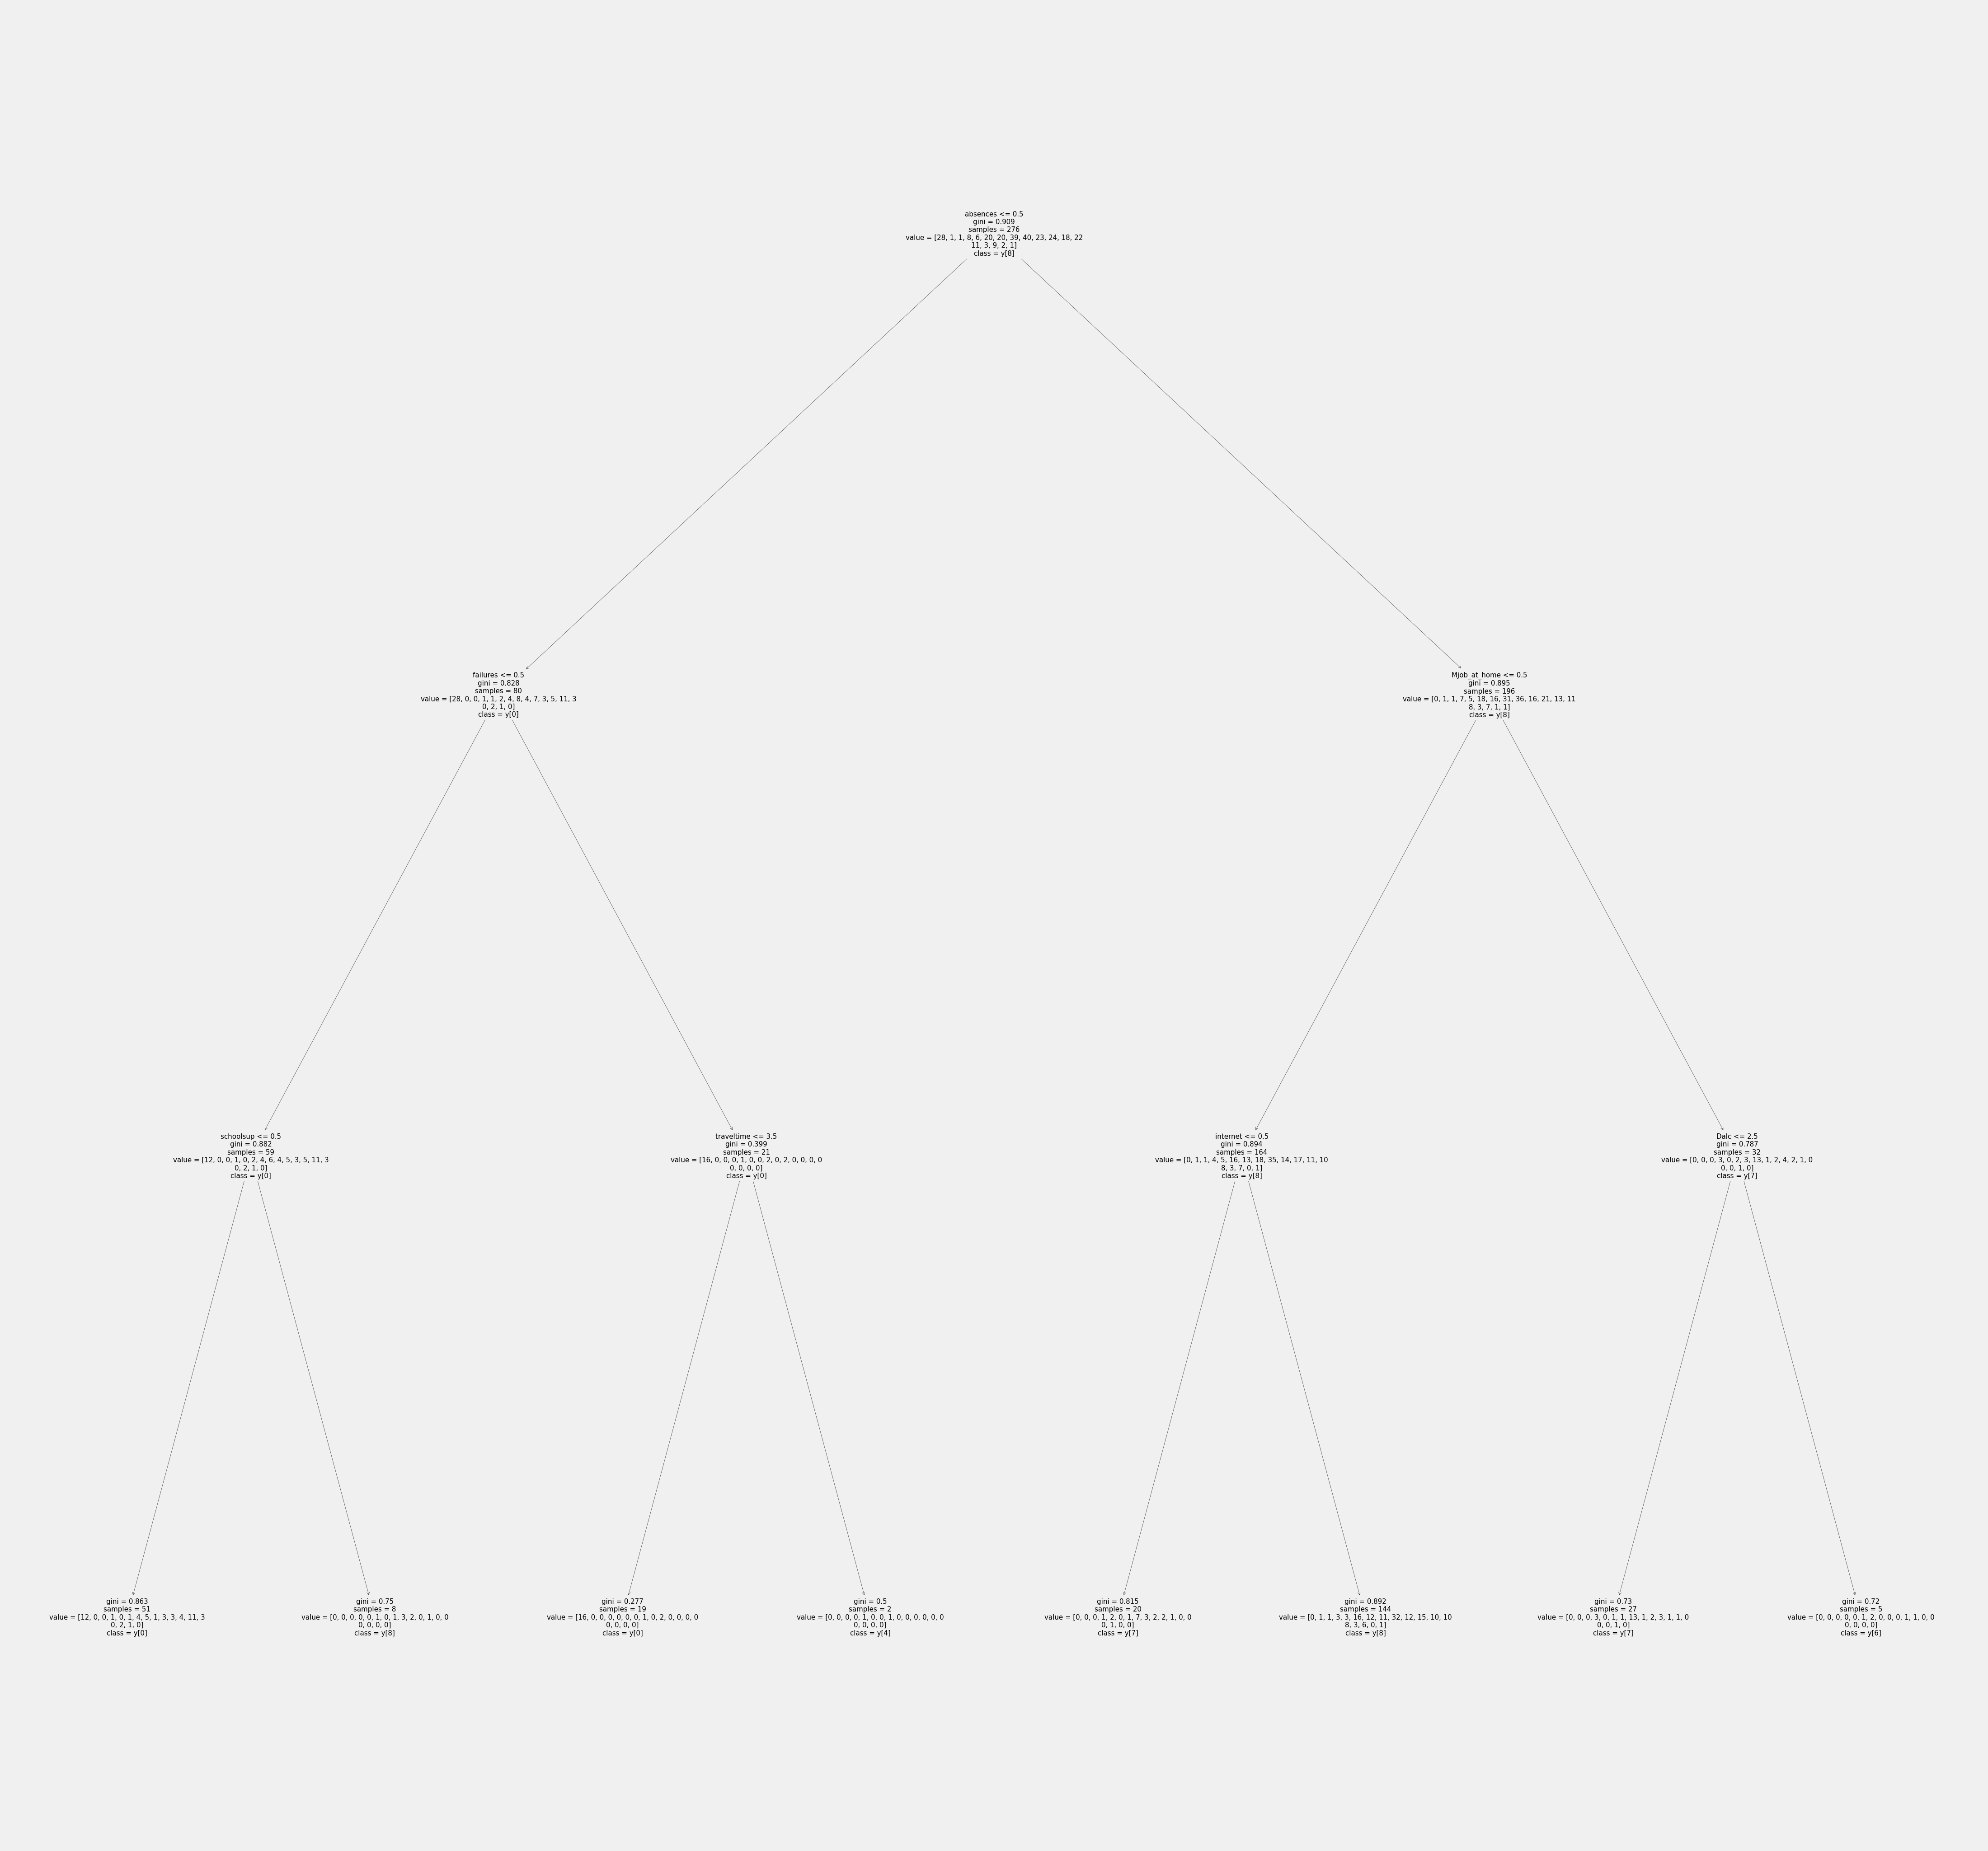

In [114]:
plt.figure(figsize=(70,70))
tree.plot_tree(T,max_depth=5,fontsize=15,class_names=True,feature_names=x_test.columns)
plt.show()

#### Самым важным признаком оказался $absences$. Важными также являются признаки: $Dalc$, $Mjobathome$, $failures$, $schoolsup$, $traveltime$, $internet$.

##### Box Plot

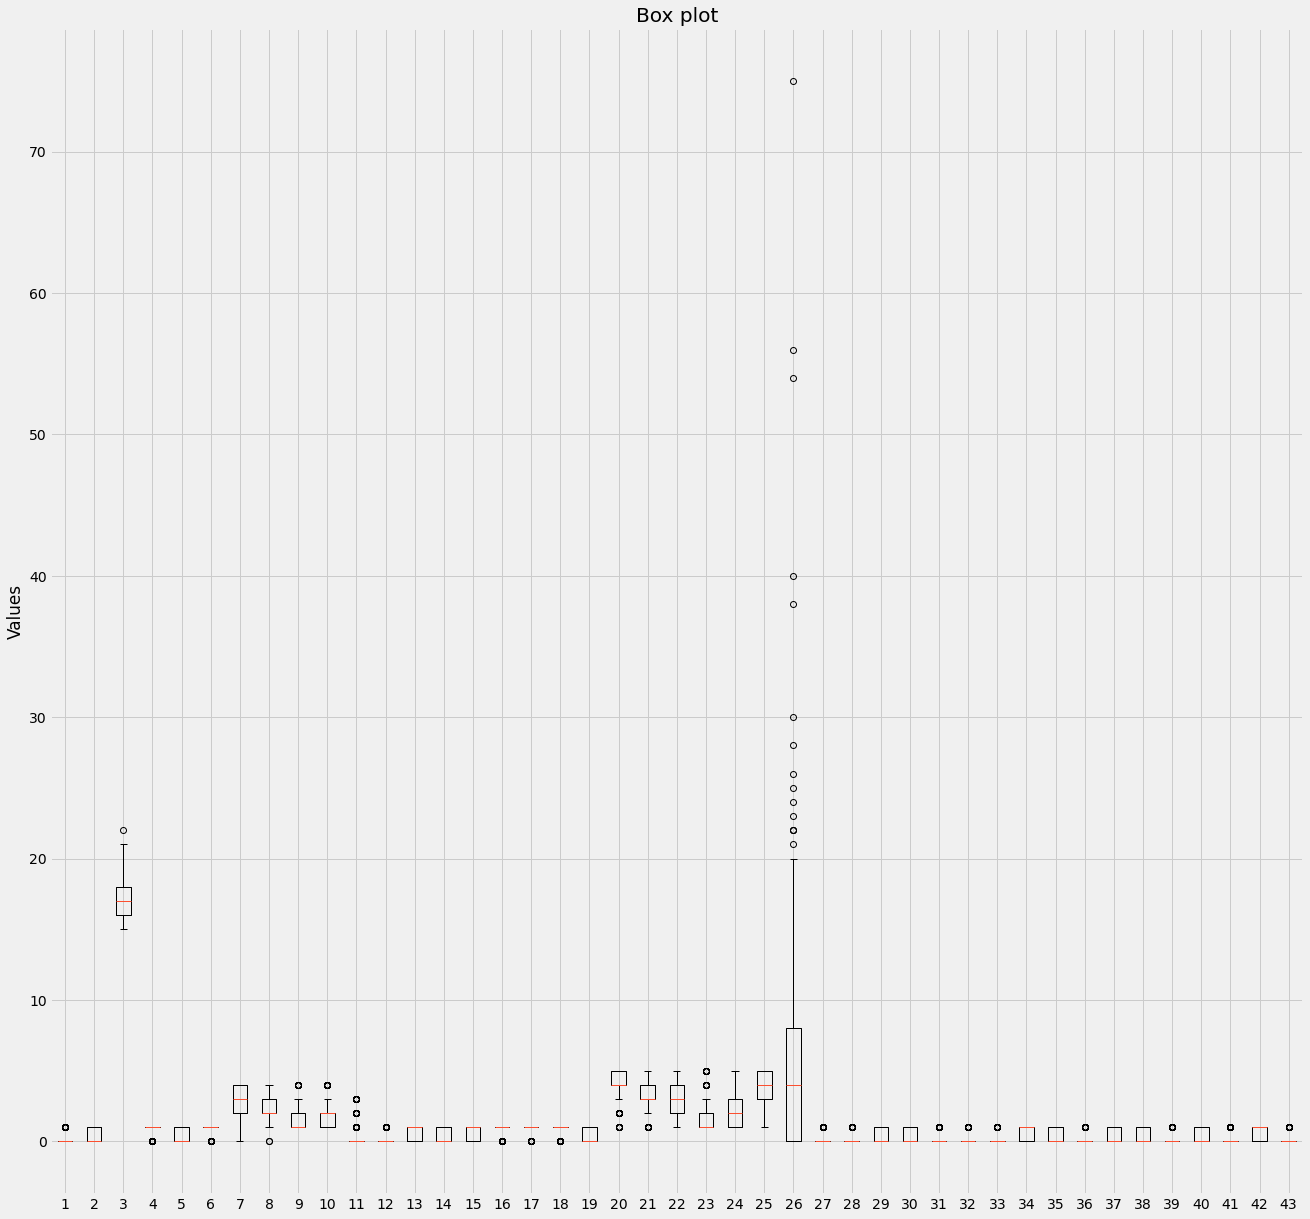

In [115]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(20,20))
ax.boxplot(parameters)

ax.set_title('Box plot')
ax.set_ylabel('Values')
plt.show()

## Кластеризация.

In [116]:
from sklearn.decomposition import PCA

for i in range(parameters_km.shape[1] + 1): 
    pca = PCA(n_components = i)
    pca.fit(parameters_km)
    if i!=0:
        print(i, sum(pca.explained_variance_ratio_))

1 0.6235287576875699
2 0.8299731015529417
3 0.8561066379469924
4 0.8773059176086336
5 0.8962488027719341
6 0.9098111465798818
7 0.9209099215639305
8 0.9291404514392115
9 0.9358440558415125
10 0.9419995335057592
11 0.9472372077700827
12 0.952132097443371
13 0.9566662402070621
14 0.9604542040828076
15 0.9639950239183559
16 0.9671324186788354
17 0.9702303012689695
18 0.9729491085858508
19 0.9754924329378031
20 0.9777413019014455
21 0.9799323014198934
22 0.9819852733489871
23 0.9838733508892794
24 0.985619615753766
25 0.9872031960173364
26 0.9886912426566732
27 0.9901348441329128
28 0.9914166279665414
29 0.9924948776123488
30 0.9935147909659635
31 0.9945102218279342
32 0.9953826056447947
33 0.9961680656954005
34 0.996940084998324
35 0.9976130280294637
36 0.9982414314064925
37 0.9988224662445165
38 0.9993078677832093
39 0.9996707560087114
40 0.9999999999999996
41 0.9999999999999996
42 0.9999999999999996
43 0.9999999999999996
44 0.9999999999999996


#### Для объяснения 90% дисперсии требуется 7 компонент.

#### Визуализация PCA.

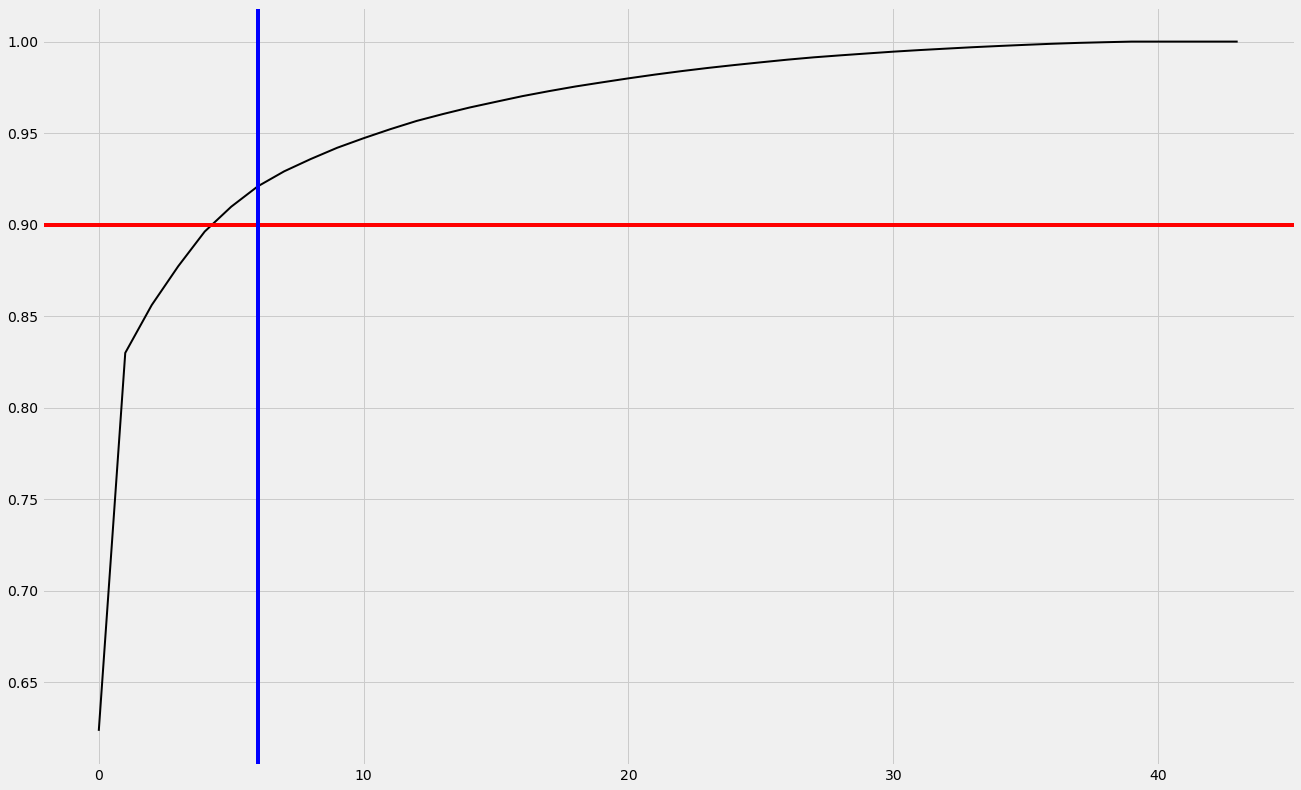

In [117]:
plt.figure(figsize=(20,13))
plt.plot(np.cumsum(pca.explained_variance_ratio_), color='k', lw=2)
plt.axhline(0.9000, c='r')
plt.axvline(6, c='b')

#### Для дальнейших действий можем снизить размерность данных с помощью pca.

In [118]:
pca = PCA(n_components=7).fit(parameters_km)
pdata = pca.transform(parameters_km)

#### Применим иерархическую кластеризацию.

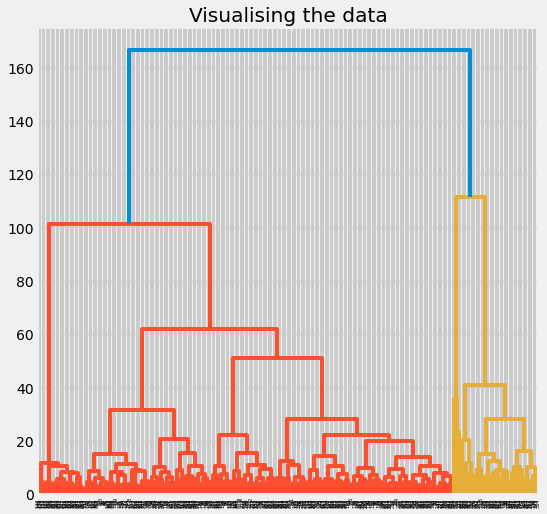

In [119]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize =(8, 8))
plt.title('Visualising the data')
Dendrogram = shc.dendrogram((shc.linkage(pdata, method ='ward')))

#### Визуализируем кластеры с помощью AgglomerativeClustering.

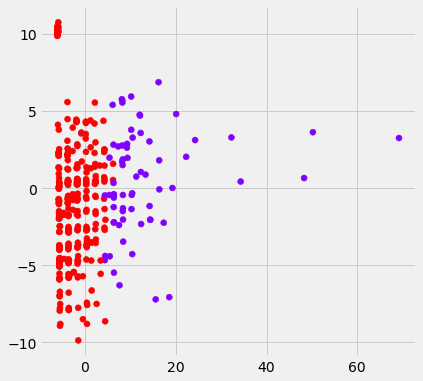

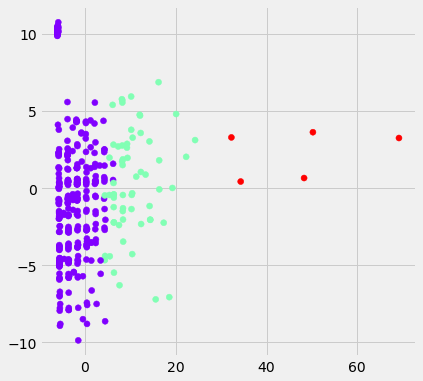

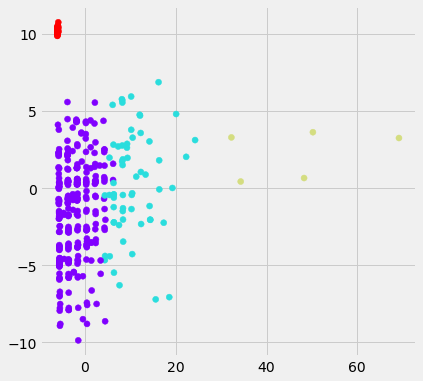

In [120]:
from sklearn.cluster import AgglomerativeClustering
for i in range(2,5):
    ac3 = AgglomerativeClustering(n_clusters = i)

    plt.figure(figsize =(6, 6))
    plt.scatter(pdata[:,0], pdata[:,1],
               c = ac3.fit_predict(pdata), cmap ='rainbow')
    plt.show()

#### DBSCAN

C:\Users\MSI\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\MSI\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


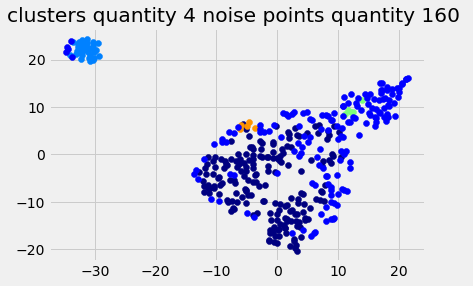

In [121]:
from sklearn.cluster import DBSCAN
from sklearn.manifold import TSNE
dbscan = DBSCAN(eps = 2.9, min_samples=5)
dbscan.fit(pdata)
labels = dbscan.labels_

#используем tsne для снижения размерности
tsne = TSNE()
pca_2d = tsne.fit_transform(pdata)

#визуализируем кластеры
for label in set(labels):
    if label == -1:
        plt.scatter(pca_2d[labels == label, 0], pca_2d[labels == label, 1], color='blue')
    else:
        plt.scatter(pca_2d[labels == label, 0], pca_2d[labels == label, 1], color=plt.cm.jet(label / np.max(labels + 1)))

plt.title('clusters quantity {} noise points quantity {} '.format(len(set(labels)) - (1 if -1 in labels else 0), np.sum(labels == -1)))
plt.show()

#### DBSCAN разделил объекты на 4 кластера.

#### K-means.

C:\Users\MSI\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


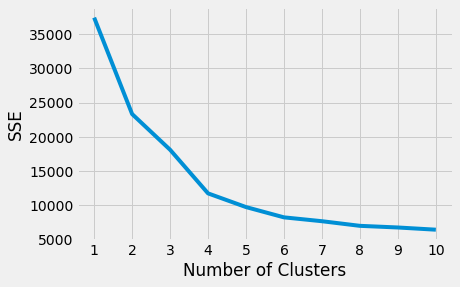

In [122]:
from sklearn.cluster import KMeans
kmeans_kwargs = {
    "init": "random",
    "n_init": 10,
    "max_iter": 300,
    "random_state": 42,
}

sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(pdata)
    sse.append(kmeans.inertia_)
    
plt.style.use("fivethirtyeight")
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

#### Оптимальное количество кластеров 4, так как график становится более монотонным начиная с этого значения.

C:\Users\MSI\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\MSI\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


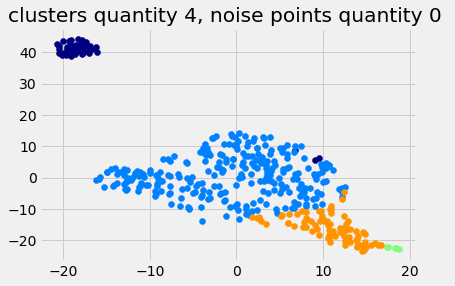

In [123]:
kmeans = KMeans(n_clusters=4, random_state = 157)
kmeans.fit(pdata)
labels = kmeans.labels_

tsne = TSNE()
pca_2d = tsne.fit_transform(pdata)

for label in set(labels):
    if label == -1:
        plt.scatter(pca_2d[labels == label, 0], pca_2d[labels == label, 1], color='blue')
    else:
        plt.scatter(pca_2d[labels == label, 0], pca_2d[labels == label, 1], color=plt.cm.jet(label / np.max(labels + 1)))

plt.title('clusters quantity {}, noise points quantity {} '.format(len(set(labels)) - (1 if -1 in labels else 0), np.sum(labels == -1)))
plt.show()

In [124]:
from sklearn.metrics import silhouette_score
label = kmeans.fit_predict(pdata)
silhouette_avg = silhouette_score(pdata,label)
print(kmeans.cluster_centers_)

[[-5.89005287e+00  9.87569938e+00 -5.41097896e-01 -1.39716441e-01
   2.02043770e-02  1.14335416e-01  3.71017135e-02]
 [-2.63054092e+00 -1.67419208e+00  9.97507584e-03  3.02893854e-02
  -3.10619545e-02 -5.71766092e-02 -1.59397631e-02]
 [ 4.68389348e+01  2.25539351e+00 -1.85709898e+00 -4.85656475e-02
  -7.48437130e-01  2.65076914e-01  9.19657662e-02]
 [ 9.08282965e+00  4.53812894e-01  3.64268838e-01 -2.79358450e-02
   1.43044733e-01  1.19298074e-01  2.94017334e-02]]


In [125]:
from sklearn.preprocessing import StandardScaler 
scaler=StandardScaler()
scaler.fit_transform(pdata)

original = scaler.inverse_transform(kmeans.cluster_centers_)
original_pca = pca.inverse_transform(original)

data=parameters_km
centr = pd.DataFrame(original_pca, columns=data.columns)
res2 = pd.DataFrame(scaler.inverse_transform(centr[['absences','Mjob_at_home','failures','schoolsup','traveltime','internet','Dalc']]), columns = ['absences','Mjob_at_home','failures','schoolsup','traveltime','internet','Dalc'])

print(centr)

     school       sex        age   address   famsize   Pstatus      Medu  \
0  0.416633  0.058607  17.622749  0.399958 -0.191596  1.295269 -0.258816   
1  0.159723  0.645988  15.656040  0.884324  0.304131  0.978964  2.823918   
2 -1.242500 -1.468246  27.334431  0.190343  0.895903 -1.019530  7.602907   
3 -0.101200  0.221793  19.097017  0.644083  0.446335  0.527484  3.748595   

       Fedu  traveltime  studytime  ...  Fjob_other  Fjob_services  \
0  0.694159    2.289182   1.599950  ...    0.760593       0.312322   
1  2.701573    1.336549   2.315380  ...    0.488500       0.250081   
2  3.589006    0.969091  -0.123302  ...    0.937706       0.512641   
3  2.786960    1.423162   1.441341  ...    0.623192       0.355818   

   Fjob_teacher  reason_course  reason_home  reason_other  reason_reputation  \
0     -0.135379       1.269875     0.106131     -0.065604          -0.310402   
1      0.129957       0.505385     0.125244      0.117291           0.252080   
2     -0.241668      -3.3593

#### Описание кластеров.

1: В основном ученики школы GP; женского пола; в возрасте 19 лет; живущие как в городе, так и в сельских пунктах; с размером семьи больше чем 3 человека; родители живут как вместе, так и раздельно; образование матери - среднее/высшее; образование отца - 5-9 классов/среднее образование; работа матери - административные органы/полиция; работа отца - административные органы/полиция; в основном состоят в отношениях; качество семейных отношений - среднее; свободное время - среднее количество свободного времени; как часто выходят на улицу - очень много проводят времени вне дома; употребление алкоголя в будни - больше среднего; употребление алкоголя в выходные - выпивают много алкоголя на выходных; здоровье - выше среднего; пропускают много занятий; имеют довольно низкие оценки.
<br>
2: В основном ученики школы GP; мужского пола; в возрасте 15 лет; живущие в основном в городе; с размером семьи больше чем 3 человека; родители живут вместе; образование матери - среднее/высшее; образование отца - среднее/высшее образование; работа матери - административные органы/полиция; работа отца - административные органы/полиция; в основном не состоят в отношениях; качество семейных отношений - выше среднего; свободное время - выше среднего количество свободного времени; как часто выходят на улицу - среднее количество времени вне дома; употребление алкоголя в будни - мало; употребление алкоголя в выходные - мало; здоровье - выше среднего; пропускают крайне мало; имеют высокие оценки.
<br>
3: В основном ученики школы MS; мужского пола; в возрасте 22 лет; живущие в сельских пунктах; с размером семьи больше чем 3 человека; родители живут вместе; образование матери - высшее; образование отца - среднее/высшее образование; работа матери - другое; работа отца - административные органы/полиция; практически все объекты данного класстера состоят в отношениях; качество семейных отношений - ниже среднего; свободное время - мало свободного времени; как часто выходят на улицу - выше среднего количества времени вне дома; употребление алкоголя в будни - очень много; употребление алкоголя в выходные - очень много; здоровье - низкий уровень здоровья; пропускают очень много; имеют очень низкие оценки.
<br>
4: В основном ученики школы GP; женского пола; в возрасте 19 лет; живущие в основном в городе; с размером семьи больше чем 3 человека;

#### Разделим наш набор данных на ранее полученные кластеры. После чего построим модели по этим наборам данных.

In [126]:
data['cluster'] = kmeans.labels_
cluster_0 = data[data['cluster'] == 0]
cluster_1 = data[data['cluster'] == 1]
cluster_2 = data[data['cluster'] == 2]
cluster_3 = data[data['cluster']==3]
target_0 = cluster_0['G3']
target_1 = cluster_1['G3']
target_2 = cluster_2['G3']
target_3 = cluster_3['G3']
cluster_0 = cluster_0.drop('G3', axis = 1)
cluster_1 = cluster_1.drop('G3', axis = 1)
cluster_2 = cluster_2.drop('G3', axis = 1)
cluster_3 = cluster_3.drop('G3',axis = 1)
cluster_0 = cluster_0.drop('cluster', axis = 1)
cluster_1 = cluster_1.drop('cluster', axis = 1)
cluster_2 = cluster_2.drop('cluster', axis = 1)
cluster_3 = cluster_3.drop('cluster',axis = 1)

C:\Users\MSI\AppData\Local\Temp\ipykernel_16588\129092105.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['cluster'] = kmeans.labels_


In [127]:
x_train, x_test, y_train, y_test = train_test_split(cluster_0, target_0, test_size = 0.2, random_state = 42)

for i in range(1,10):
    T=DecisionTreeClassifier(random_state=42, max_depth=i)
    T=T.fit(x_train, y_train)
    prediction=T.predict(x_test)
    report=classification_report(y_test, prediction)
    print(i, T.score(x_test, y_test))

1 1.0
2 1.0
3 1.0
4 1.0
5 1.0
6 1.0
7 1.0
8 1.0
9 1.0


In [128]:
x_train, x_test, y_train, y_test = train_test_split(cluster_1, target_1, test_size = 0.3, random_state = 42)

for i in range(1,10):
    T=DecisionTreeClassifier(random_state=42, max_depth=i)
    T=T.fit(x_train, y_train)
    prediction=T.predict(x_test)
    report=classification_report(y_test, prediction)
    print(i, T.score(x_test, y_test))

1 0.19753086419753085
2 0.13580246913580246
3 0.07407407407407407
4 0.07407407407407407
5 0.08641975308641975
6 0.08641975308641975
7 0.08641975308641975
8 0.09876543209876543
9 0.08641975308641975


C:\Users\MSI\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\MSI\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\MSI\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\MSI\anaconda3\lib\site-packages\sklearn\metrics\_cla

In [129]:
x_train, x_test, y_train, y_test = train_test_split(cluster_2, target_2, test_size = 0.8, random_state = 42)

for i in range(1,10):
    T=DecisionTreeClassifier(random_state=42, max_depth=i)
    T=T.fit(x_train, y_train)
    prediction=T.predict(x_test)
    report=classification_report(y_test, prediction)
    print(i, T.score(x_test, y_test))

1 0.25
2 0.25
3 0.25
4 0.25
5 0.25
6 0.25
7 0.25
8 0.25
9 0.25


C:\Users\MSI\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\MSI\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\MSI\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\MSI\anaconda3\lib\site-packages\sklearn\metrics\_cla

In [130]:
x_train, x_test, y_train, y_test = train_test_split(cluster_3, target_3, test_size = 0.3, random_state = 42)

for i in range(1,10):
    T=DecisionTreeClassifier(random_state=42, max_depth=i)
    T=T.fit(x_train, y_train)
    prediction=T.predict(x_test)
    report=classification_report(y_test, prediction)
    print(i, T.score(x_test, y_test))

1 0.041666666666666664
2 0.16666666666666666
3 0.125
4 0.08333333333333333
5 0.16666666666666666
6 0.125
7 0.125
8 0.20833333333333334
9 0.08333333333333333


C:\Users\MSI\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\MSI\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\MSI\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\MSI\anaconda3\lib\site-packages\sklearn\metrics\_cla

#### До кластеризации лучшей моделью стал случайный лес, попробуем применить случайный лес к нашим данным после кластеризации.

#### Случайный лес для первого кластера.

In [131]:
x_train, x_test, y_train, y_test = train_test_split(cluster_0, target_0, test_size = 0.3, random_state = 42)
T=RandomForestClassifier(random_state=42)

grid_parametres = {
    'n_estimators': [100,200,300],
    'max_depth':[1,2,3,4,5,6,7,8,9,10]
}

gridCV=GridSearchCV(T, param_grid=grid_parametres, cv=5, scoring='accuracy')
model_gridCV=gridCV.fit(x_train, y_train)

print('Best hyperparameters:', model_gridCV.best_params_)
print('Best score:', model_gridCV.best_score_)


C:\Users\MSI\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Best hyperparameters: {'max_depth': 1, 'n_estimators': 100}
Best score: 0.9


#### С помощью GridSearch попробуем перебрать параметр n_estimators, чтобы указать его более точно.

In [132]:
T=RandomForestClassifier(random_state=42)

grid_parametres = {
    'n_estimators': [10,20,30,40,50,60,70,80,90,100,110,120,130,140],
    'max_depth':[1,2,3,4,5,6,7,8,9,10]
}

gridCV=GridSearchCV(T, param_grid=grid_parametres, cv=5, scoring='accuracy')
model_gridCV=gridCV.fit(x_train, y_train)

print('Best hyperparameters:', model_gridCV.best_params_)
print('Best score:', model_gridCV.best_score_)

C:\Users\MSI\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Best hyperparameters: {'max_depth': 1, 'n_estimators': 10}
Best score: 0.9


#### Модель случайного леса для первого кластера показывает высокую точность, несмотря на то, что лучшими параметрами является как можно меньшая высота и как можно меньшее значение n_estimators. Возможно это связано с маленьким количеством объектов в классе, которые очень сильно сходятся друг с другом по всем параметрам.

In [133]:
cluster_0.shape

(41, 43)

#### Случайный лес для второго кластера.

In [134]:
x_train, x_test, y_train, y_test = train_test_split(cluster_1, target_1, test_size = 0.3, random_state = 42)
T=RandomForestClassifier(random_state=42)

grid_parametres = {
    'n_estimators': [100,200,300],
    'max_depth':[1,2,3,4,5,6,7,8,9,10]
}

gridCV=GridSearchCV(T, param_grid=grid_parametres, cv=5, scoring='accuracy')
model_gridCV=gridCV.fit(x_train, y_train)

print('Best hyperparameters:', model_gridCV.best_params_)
print('Best score:', model_gridCV.best_score_)


C:\Users\MSI\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


Best hyperparameters: {'max_depth': 1, 'n_estimators': 100}
Best score: 0.1694167852062589


#### С помощью GridSearch попробуем перебрать параметр n_estimators, чтобы указать его более точно.

In [135]:
T=RandomForestClassifier(random_state=42)

grid_parametres = {
    'n_estimators': [10,20,30,40,50,60,70,80,90,100,110,120,130,140],
    'max_depth':[1,2,3,4,5,6,7,8,9,10]
}

gridCV=GridSearchCV(T, param_grid=grid_parametres, cv=5, scoring='accuracy')
model_gridCV=gridCV.fit(x_train, y_train)

print('Best hyperparameters:', model_gridCV.best_params_)
print('Best score:', model_gridCV.best_score_)


C:\Users\MSI\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


Best hyperparameters: {'max_depth': 1, 'n_estimators': 110}
Best score: 0.17467994310099572


In [136]:
cluster_1.shape

(270, 43)

#### Кластер 3 содержит только 5 объектов, применение случайного леса не имеет большого смысла.

In [137]:
cluster_2.shape

(5, 43)

#### Кластер 4.

In [138]:
cluster_3.shape

(79, 43)

In [139]:
x_train, x_test, y_train, y_test = train_test_split(cluster_3, target_3, test_size = 0.3, random_state = 42)
T=RandomForestClassifier(random_state=42)

grid_parametres = {
    'n_estimators': [100,200,300],
    'max_depth':[1,2,3,4,5,6,7,8,9,10]
}

gridCV=GridSearchCV(T, param_grid=grid_parametres, cv=5, scoring='accuracy')
model_gridCV=gridCV.fit(x_train, y_train)

print('Best hyperparameters:', model_gridCV.best_params_)
print('Best score:', model_gridCV.best_score_)


C:\Users\MSI\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Best hyperparameters: {'max_depth': 1, 'n_estimators': 100}
Best score: 0.18181818181818182


In [140]:
T=RandomForestClassifier(random_state=42)

grid_parametres = {
    'n_estimators': [10,20,30,40,50,60,70,80,90,100,110,120,130,140],
    'max_depth':[1,2,3,4,5,6,7,8,9,10]
}

gridCV=GridSearchCV(T, param_grid=grid_parametres, cv=5, scoring='accuracy')
model_gridCV=gridCV.fit(x_train, y_train)

print('Best hyperparameters:', model_gridCV.best_params_)
print('Best score:', model_gridCV.best_score_)


C:\Users\MSI\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Best hyperparameters: {'max_depth': 1, 'n_estimators': 40}
Best score: 0.2


#### Построение моделей для данных после их кластеризации дало следующие результаты:
первый кластер: случайный лес - 90% точности, решающее дерево - 100% точности <br> второй кластер: случайный лес - 17% точности, решающее дерево - 19% точности <br> третий кластер: метод случайного леса применять бессмысленно, так как мало объектов внутри класстера, решающее дерево - 25% точности <br> четвертый кластер: случайный лес - 20% точности, решающее дерево - 20% точности.